In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
from sklearn import preprocessing

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### 1. *k*-means on a Randomly Generated Dataset
30 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [0]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [0]:
centers = [[-2, 2], [2, -2]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-2,-2],[-2,-2]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [0]:
def assign_members(x1, x2, centers):
    centers = np.array(centers)
    result = np.zeros(len(x1))
    colors = ['b']*30
    for i in range(len(x1)):
        x = x1[i]
        y = x2[i]
        data_point = np.array([x,y])
        res1 = np.linalg.norm(data_point-centers[0])
        res2 = np.linalg.norm(data_point-centers[1])
        if(res1 > res2):
            result[i] = 1
            colors[i] = 'r'  
    return result, colors

#### Define a function that updates the centroid of each cluster

In the `update_centers` function you will take along with both features the class of points as parameter and returns the updated centers

In [0]:
def update_centers(x1, x2, class_of_points):
    sum_X_zero = 0
    sum_Y_zero = 0
    sum_X_one = 0
    sum_Y_one = 0
    count_zero = 0
    count_one = 0
    for i in range(len(class_of_points)):
        if(class_of_points[i] == 0):
            sum_X_zero += x1[i]
            sum_Y_zero += x2[i]
            count_zero += 1
        else:
            sum_X_one += x1[i]
            sum_Y_one += x2[i]
            count_one += 1
    
    center_zero = [sum_X_zero/count_zero, sum_Y_zero/count_zero]
    center_one = [sum_X_one/count_one, sum_Y_one/count_one]
    return [center_zero, center_one]    

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [0]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=20)

    plt.show()

#### Initialize data points and centers and plot

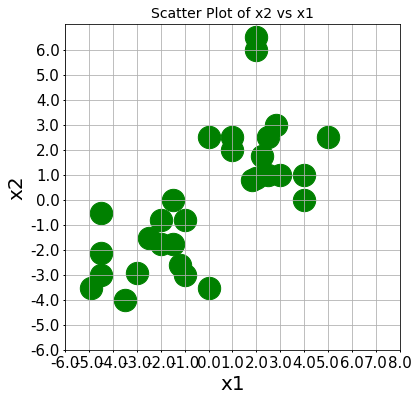

In [0]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

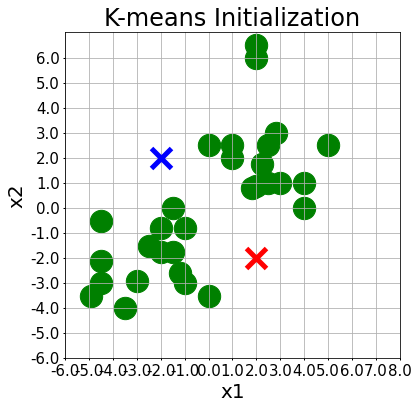

In [0]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   
The last two plots should look like this after running it for 4 iterations after which it converges 

![Cluster Assignment](ClusterAssignment.PNG)
![Centroid Update](CenterUpdate.PNG)


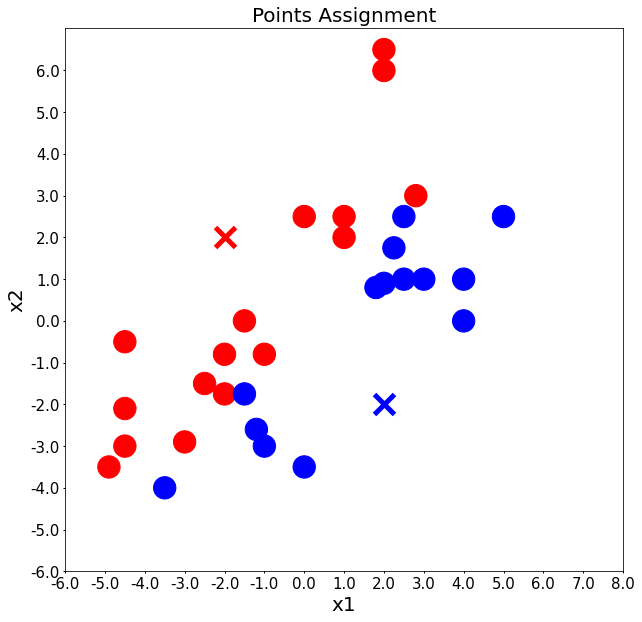

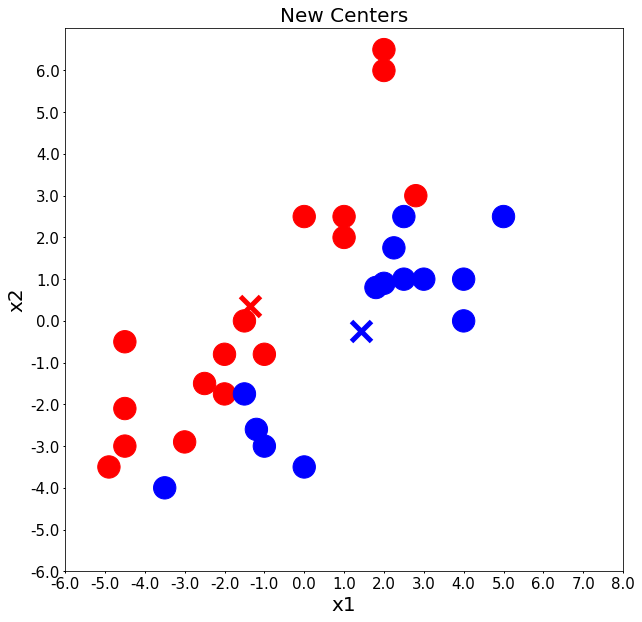

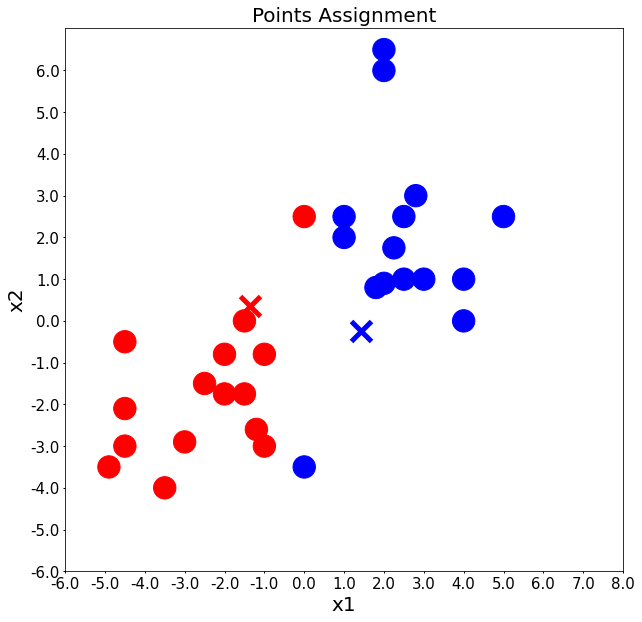

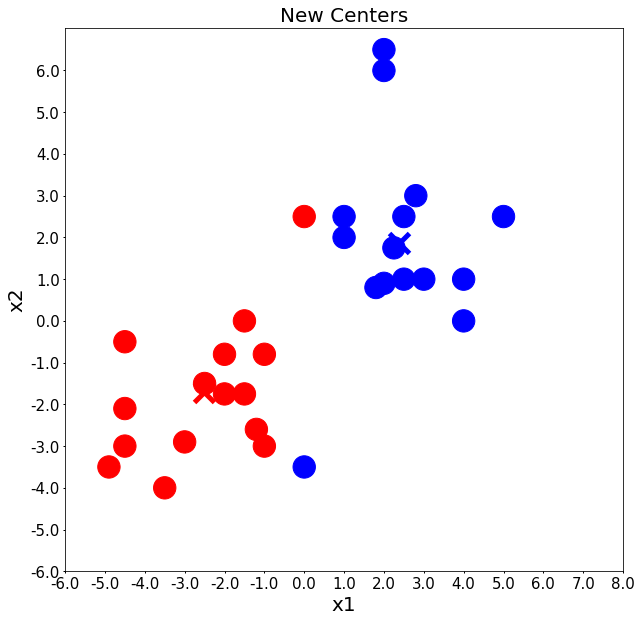

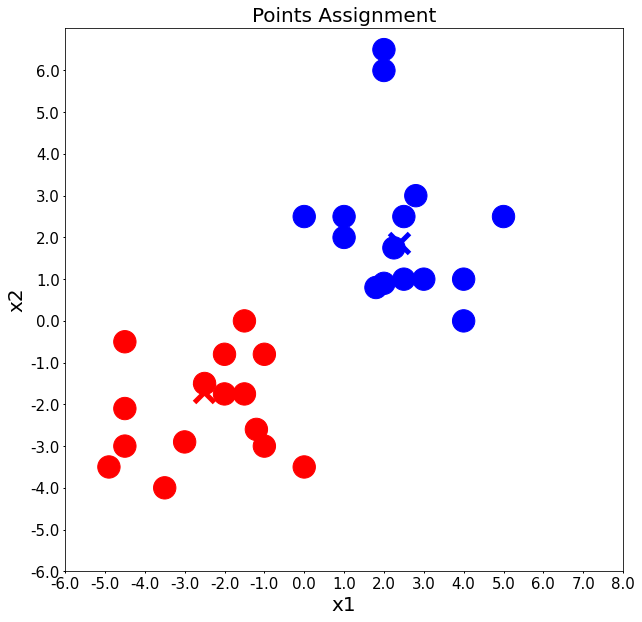

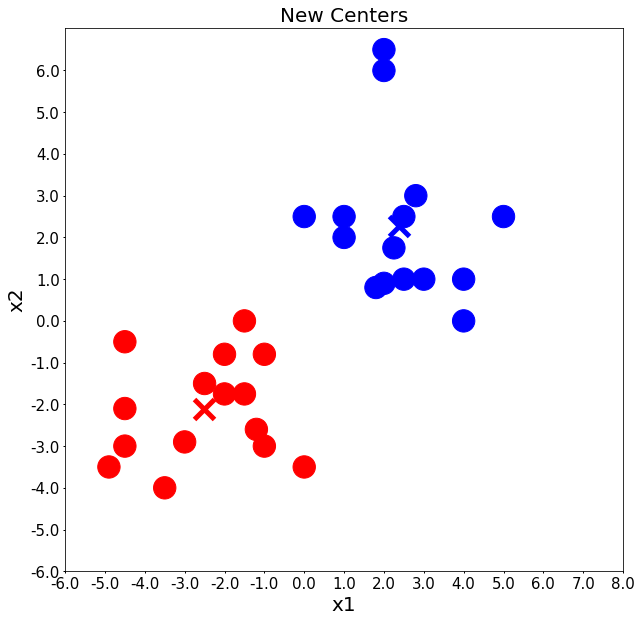

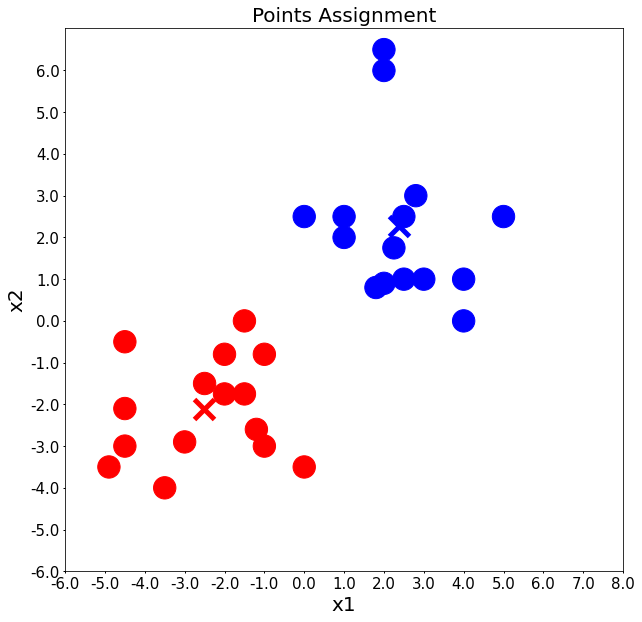

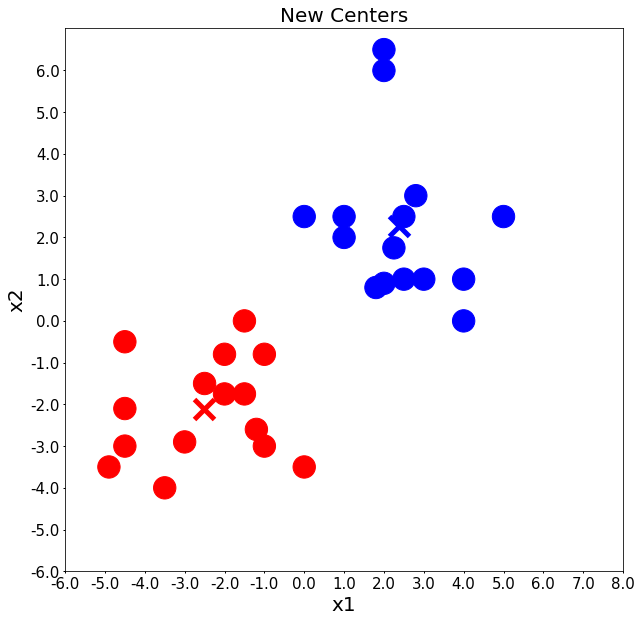

In [0]:
centers = [[2, -2], [-2, 2]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    classes, colors = assign_members(x1, x2, centers)
    plot_points(centroids=centers, colors=colors, figure_title='Points Assignment')
    centers = update_centers(x1, x2, classes)
    plot_points(centroids=centers, colors=colors, figure_title='New Centers')

### 2. *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [0]:
# Your code goes here
cust_seg = pd.read_csv('/content/drive/My Drive/DMA3/customer_segmentation.csv')
cust_seg.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [0]:
# Your code goes here
cust_seg.drop(columns=['Customer Id', 'Address', 'Defaulted'], inplace=True)

**Question:** Explain why you dropped those columns (if any)?

**Answer:** The address column is of type string so it cannot be used in k means clustering. The defaulted column and the customer ID column are both discrete hence also removed.

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [0]:
# Your code goes here
print(cust_seg.count())
print(str(cust_seg.isna().sum()))

Age                850
Edu                850
Years Employed     850
Income             850
Card Debt          850
Other Debt         850
DebtIncomeRatio    850
dtype: int64
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64


**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** There were no NaN entries hence no method was used to fill these

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [0]:
# Your code goes here
X = cust_seg.values # Normalized numpy array, used later in the visualization step

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 3 clusters here.
Initailize the `n_init` parameter to equal 12

In [0]:
# Your code goes here
W = preprocessing.normalize(X, axis=0)
# Initialize
k_means = KMeans(n_clusters=3, n_init=12)
# Fit
k_means.fit(W)
# Print labels
k_means.labels_

array([1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  
1. The elbow method
2. The silhouette method

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [0]:
# Your code goes here
labels = k_means.labels_
cust_seg['Labels'] = labels

**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

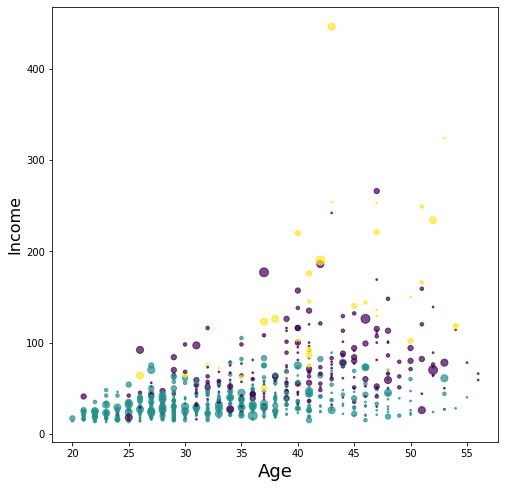

In [0]:
area = np.pi * ( X[:, 1])**2  
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.7)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
# plt.grid()
plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 3 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [0]:
# Your code goes here
group_0 = cust_seg[cust_seg['Labels'] == 0]
group_1 = cust_seg[cust_seg['Labels'] == 1]
group_2 = cust_seg[cust_seg['Labels'] == 2]

In [0]:
print('Group 0 \nAverage Age:', str(group_0.Age.mean()), 'Average Income:', str(group_0.Income.mean()), 'Average Years Employed:', str(group_0['Years Employed'].mean()), 'Average Debt To Income Ratio:', str(group_0['DebtIncomeRatio'].mean()))
print('Group 1 \nAverage Age:', str(group_1.Age.mean()), 'Average Income:', str(group_1.Income.mean()), 'Average Years Employed:', str(group_1['Years Employed'].mean()), 'Average Debt To Income Ratio:', str(group_1['DebtIncomeRatio'].mean()))
print('Group 2 \nAverage Age:', str(group_2.Age.mean()), 'Average Income:', str(group_2.Income.mean()), 'Average Years Employed:', str(group_2['Years Employed'].mean()), 'Average Debt To Income Ratio:', str(group_2['DebtIncomeRatio'].mean()))

Group 0 
Average Age: 39.572052401746724 Average Income: 69.1528384279476 Average Years Employed: 14.157205240174672 Average Debt To Income Ratio: 13.452401746724885
Group 1 
Average Age: 32.75471698113208 Average Income: 31.725557461406517 Average Years Employed: 5.801029159519725 Average Debt To Income Ratio: 8.281475128644939
Group 2 
Average Age: 42.55263157894737 Average Income: 140.57894736842104 Average Years Employed: 17.289473684210527 Average Debt To Income Ratio: 19.400000000000002


Characteristics for each cluster  
1. Cluster 0 represents the middle aged folk who have worked for a substantial amount of time and earn a moderate sum of money
2. Cluster 1 represents young adults who have only experienced the job market recently and hence earn a low sum of money
3. Cluster 2 represents the people who have been working for much longer now and earn a substantially high sum of money

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. K means clustering is faster when working with big data as opposed to hierarchal clustering. This is because the time complexity of K means is O(n) while that of hierarchical clustering is O(n^2)
2. K means is relatively simple to implement as opposed to the other two algorithms

**Disadvantages**
1. Kmeans doesnt work well for non-globular structures whilst DBscan does as it works with density rather than distance
2. K means doesn't work well with high dimensionality data and the distance between points decreases which leads to the convergence being ineffective

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [0]:
### Code here
cust_shop = pd.read_csv("/content/drive/My Drive/DMA3/customers_shopping.csv")

In [0]:
print(str(len(cust_shop.index)))
cust_shop.isnull().sum()

200


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
cust_shop.drop(columns=['CustomerID', 'Genre'], inplace=True)
cust_shop.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


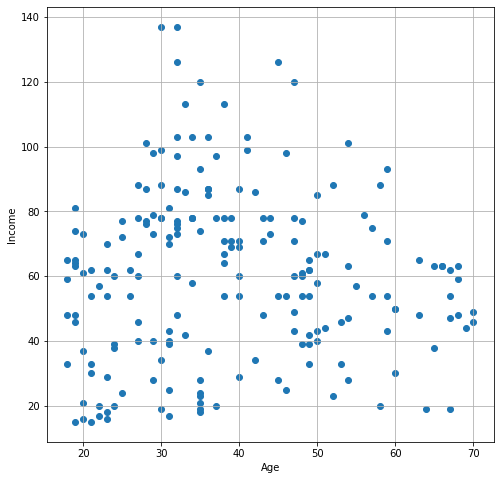

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(cust_shop['Age'], cust_shop['Annual Income (k$)'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
# ax.set_zlabel('Spending Score')
plt.grid()
plt.show()

In [0]:
X = cust_shop.values

In [0]:
W = preprocessing.normalize(X, axis=0)

**Dendrogram** is used to visualize the history of groupings and figure out the optimal number of clusters.

**Question:** Draw **two dendograms using two different linkage methods**. *Comment on the cause of differences between the two*.

Pick **one** of the above which you find to be the best. Mention the **number of clusters** and justify your answer.

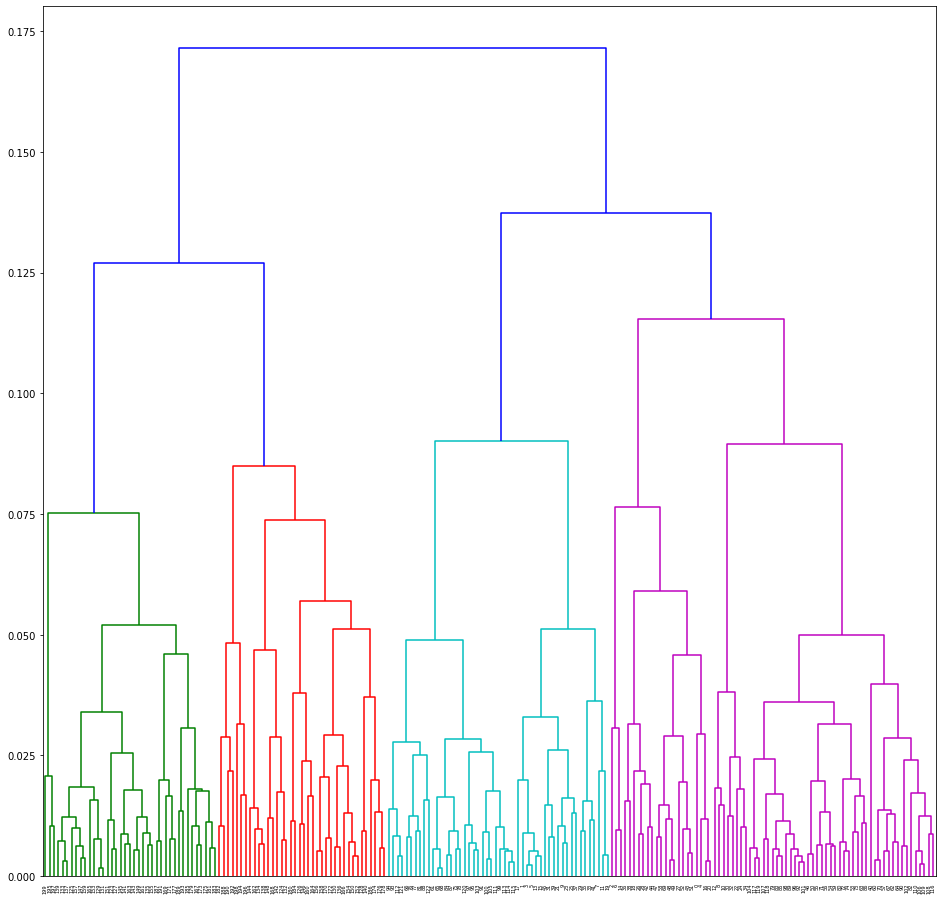

In [0]:
#### Draw dendrogram here
complete_res = sch.linkage(W, method='complete')
plt.figure(figsize=(16,16))
dn = sch.dendrogram(complete_res)
plt.show()

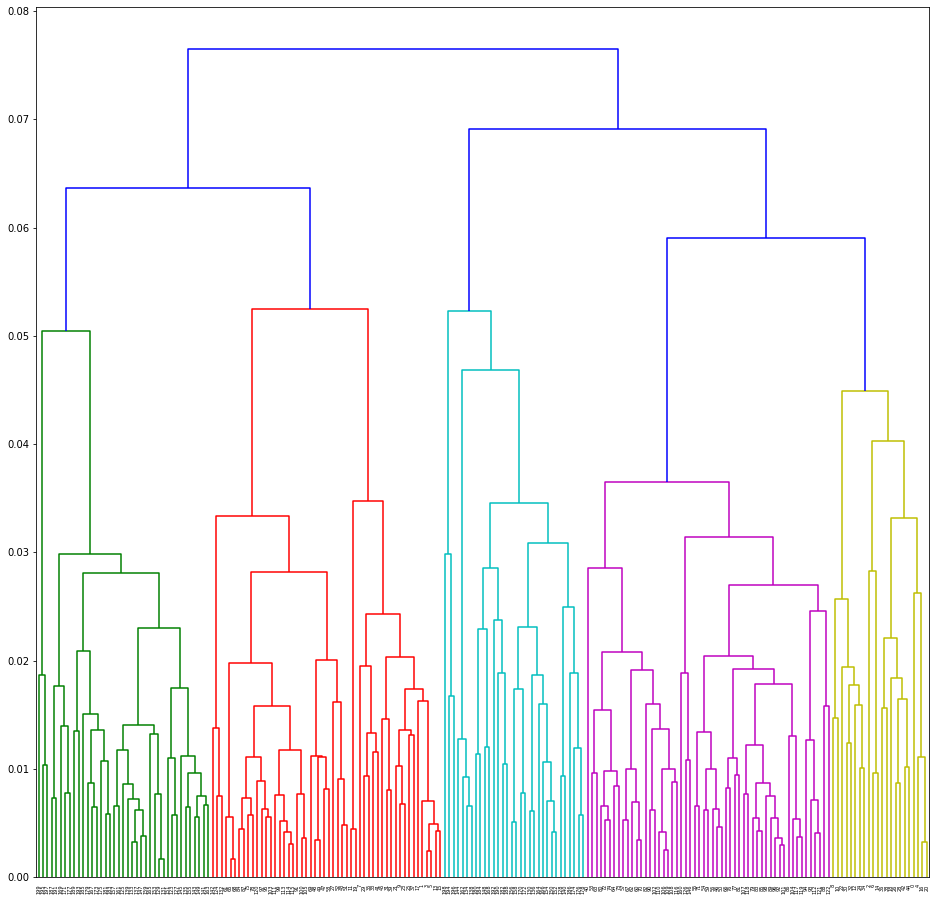

In [0]:
#### Draw dendrogram here
average_res = sch.linkage(W, method='average')
plt.figure(figsize=(16,16))
sch.dendrogram(average_res)
plt.show()

### Cause of Differences: 
Since these linkage methods use different similarity measures to create clusters, different linkages are formed hence the dendrogram is of a different shape. In this case the complete linkage method tries to break large clusters and hence has one cluster short of the average method.

### Optimal Number of Clusters: 
4

### Justification:
After trying 6 different linkage methods, 3 methods returned 4 clusters whilst the other 3 returned 2, 5, and 6 clusters. With this i decided to pick 4 clusters as that is the most common answer

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

In [0]:
### write your code here
clustering = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(W)
cust_shop['Labels'] = clustering.labels_

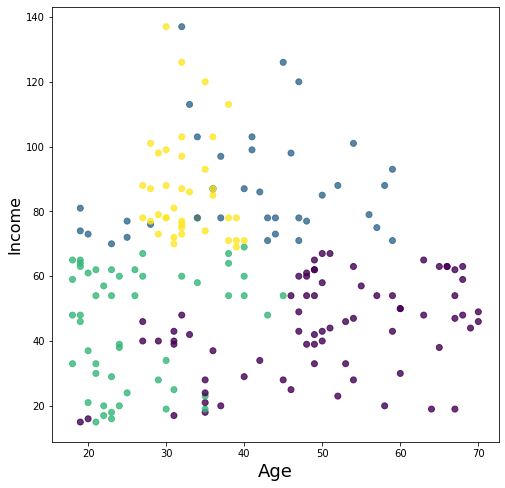

In [0]:
labels = clustering.labels_
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2],  c=labels.astype(np.float), alpha=0.7)
# ax.set_xlabel('Age')
# ax.set_ylabel('Income')
# ax.set_zlabel('Spending Score')
# # plt.grid()
# plt.show()

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.8, )
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
# plt.grid()
plt.show()

**Question:** What do each of the clusters represent?

**Answer:** 


1.   The purple cluster represets the low to moderate income group, for whom the majority of people are middle aged or elderly
2.   The green cluster represents the young group with a low to moderate income
3. The yellow cluster represents the rich youth, almost all of whom are below the agee of 40 and earning more than 70k dollars a year.
4. The blue cluster represents the high income group from almost all ages, Almost all members are earning over the 70k a year and have a large age range. 



In [0]:
clus_0 = cust_shop[cust_shop['Labels'] == 0]
clus_1 = cust_shop[cust_shop['Labels'] == 1]
clus_2 = cust_shop[cust_shop['Labels'] == 2]
clus_3 = cust_shop[cust_shop['Labels'] == 3]
# clus_4 = cust_shop[cust_shop['Labels'] == 4]

In [0]:
print("Cluster 0 \nAverage Age: ", str(clus_0['Age'].mean()), "Average Income: ", str(clus_0['Annual Income (k$)'].mean()))
print("Cluster 1 \nAverage Age: ", str(clus_1['Age'].mean()), "Average Income: ", str(clus_1['Annual Income (k$)'].mean()))
print("Cluster 2 \nAverage Age: ", str(clus_2['Age'].mean()), "Average Income: ", str(clus_2['Annual Income (k$)'].mean()))
print("Cluster 3 \nAverage Age: ", str(clus_3['Age'].mean()), "Average Income: ", str(clus_3['Annual Income (k$)'].mean()))
# print("Cluster 4 \nAverage Age: ", str(clus_4['Age'].mean()), "Average Income: ", str(clus_4['Annual Income (k$)'].mean()))


Cluster 0 
Average Age:  50.66233766233766 Average Income:  47.311688311688314
Cluster 1 
Average Age:  24.653846153846153 Average Income:  42.94230769230769
Cluster 2 
Average Age:  41.0 Average Income:  89.40625
Cluster 3 
Average Age:  32.69230769230769 Average Income:  86.53846153846153
